In [26]:
import pandas as pd 
import numpy as np

In [16]:
# import dataset yang telah dipreprocessing
df = pd.read_csv("Text_Preprocessing.csv", usecols=["Kategori", "Komentar_tokens_stemmed"])
df.columns = ["kategori", "komentar"]

df.head()

,kategori,komentar
0,Non-bullying,"['kakak', 'tidur', 'sudah', 'pagi', 'tidak bol..."
1,Non-bullying,"['makan', 'nasi', 'padang', 'saja', 'badan']"
2,Bullying,"['suka', 'cukur', 'jembut', 'manggung']"
3,Non-bullying,"['hai', 'kakak', 'isyana', 'ngefans', 'sekali'..."
4,Non-bullying,"['manusia', 'bidadari', 'sih', 'heran', 'deh',..."


In [41]:
#melihat tipe data pada kolom komentar
print("\nsebelum diubah : ", df["komentar"][0])
print("\ntype : ", type(df["komentar"][0]))

#mengubah string ke list pada kolom komentar
import ast
def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df["list_kmtr"] = df["komentar"].apply(convert_text_list)


print("\nsetelah diubah : ",df["list_kmtr"][0])
print("\ntype : ", type(df["list_kmtr"][0]))


sebelum diubah :  ['kakak', 'tidur', 'sudah', 'pagi', 'tidak boleh', 'lelah']

type :  <class 'str'>

setelah diubah :  ['kakak', 'tidur', 'sudah', 'pagi', 'tidak boleh', 'lelah']

type :  <class 'list'>


Term Frequency merupakan frekuensi kemunculan term i pada dokumen j dibagi dengan total term pada dokumen j. Ditulis dalam bentuk,

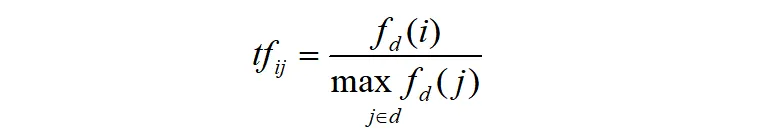

In [37]:
#implementasi TF
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['list_kmtr'].apply(calc_TF)

#mengecek hasil TF
index = 0

print('%20s' % "term", "\t", "TF\n")
for key in df["TF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key])


                term 	 TF

               kakak 	 0.16666666666666666
               tidur 	 0.16666666666666666
               sudah 	 0.16666666666666666
                pagi 	 0.16666666666666666
         tidak boleh 	 0.16666666666666666
               lelah 	 0.16666666666666666


IDF berfungsi mengurangi bobot suatu term jika kemunculannya banyak tersebar diseluruh dokumen, dituliskan dalam bentuk,

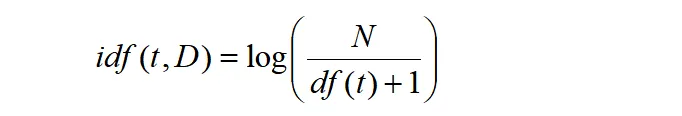

- N adalah jumlah total document dalam corpus, N =|D|
- df(t) adalah jumlah dokumen yang mengandung term t, Penambahan 1 untuk menghindari pembagian terhadap 0 jika df(t) tidak ditemukan pada corpus

In [31]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

print(DF)

{'kakak': 69, 'tidur': 5, 'sudah': 76, 'pagi': 2, 'tidak boleh': 1, 'lelah': 4, 'makan': 10, 'nasi': 2, 'padang': 1, 'saja': 82, 'badan': 3, 'suka': 24, 'cukur': 1, 'jembut': 2, 'manggung': 1, 'hai': 2, 'isyana': 22, 'ngefans': 2, 'sekali': 59, 'lagu': 6, 'dalam': 3, 'jiwa': 3, 'manusia': 12, 'bidadari': 16, 'sih': 49, 'heran': 8, 'deh': 10, 'cantik': 72, 'kinanti': 1, 'sekarang': 4, 'ubah': 4, 'baju': 7, 'nakal': 1, 'gemesnya': 1, 'mirip': 54, 'tango': 1, 'jelek': 21, 'anak': 27, 'ayah': 5, 'cakap': 9, 'tua': 7, 'begitu': 23, 'muka': 62, 'tasya': 1, 'kok': 3, 'ngegemesin': 2, 'lucu': 6, 'kolot': 1, 'bayi': 4, 'gila': 12, 'orang': 53, 'jomblo': 1, 'psikolog': 1, 'laku': 4, 'kamu': 116, 'sinting': 1, 'tingkat': 1, 'dewa': 1, 'lutfi': 2, 'putus': 7, 'salsa': 1, 'stres': 4, 'tolol': 4, 'aktif': 1, 'ibu': 25, 'mati': 7, 'gedeg': 1, 'saya': 43, 'liat': 22, 'anjing': 67, 'sok': 11, 'asyik': 1, 'apasih': 1, 'kontol': 10, 'tengkar': 1, 'ayo': 2, 'bangsat': 9, 'pelakor': 2, 'plus': 2, 'hamil': 

In [11]:
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

print(IDF)

{'kakak': 2.228477120840324, 'tidur': 4.685212893661628, 'sudah': 2.133166941035999, 'pagi': 5.378360074221573, 'tidak boleh': 5.783825182329737, 'lelah': 4.867534450455582, 'makan': 4.079077090091312, 'nasi': 5.378360074221573, 'padang': 5.783825182329737, 'saja': 2.058131755093085, 'badan': 5.090678001769792, 'suka': 3.258096538021482, 'cukur': 5.783825182329737, 'jembut': 5.378360074221573, 'manggung': 5.783825182329737, 'hai': 5.378360074221573, 'isyana': 3.341478146960533, 'ngefans': 5.378360074221573, 'sekali': 2.3826278006675823, 'lagu': 4.531062213834369, 'dalam': 5.090678001769792, 'jiwa': 5.090678001769792, 'manusia': 3.912023005428146, 'bidadari': 3.6437590188334665, 'sih': 2.5649493574615367, 'heran': 4.279747785553464, 'deh': 4.079077090091312, 'cantik': 2.1865129217412917, 'kinanti': 5.783825182329737, 'sekarang': 4.867534450455582, 'ubah': 4.867534450455582, 'baju': 4.3975308212098465, 'nakal': 5.783825182329737, 'gemesnya': 5.783825182329737, 'mirip': 2.469639177657212,

In [12]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [16]:
# Check TF-IDF result
index = 100

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])


                term 	         TF 	              TF-IDF

                kang 	 0.2 	 1.0756720148443146
                ojek 	 0.2 	 1.1567650364659474
                kali 	 0.2 	 0.9370425787323257
              belang 	 0.2 	 1.1567650364659474
              tangan 	 0.2 	 0.9062124427668738


In [19]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.3555278235059998, 0.0, 0.37141285347338726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7808688156102713, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [20]:
# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
5,anjing,34.461480
0,kamu,33.376984
3,cantik,28.090925
4,kakak,24.773783
2,sudah,24.315317
...,...,...
893,bocor,0.289191
751,sirik,0.240993
750,tanda,0.240993
749,ngebuli,0.240993


In [21]:
df.to_csv("feature.csv")

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()
X = cv.fit_transform(df['komentar']).toarray()
y = df['kategori']

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [22]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['Bullying', 'Bullying', 'Non-bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Non-bullying',
       'Bullying', 'Non-bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Bullying', 'Bullying', 'Bullying', 'Non-bullying', 'Bullying',
       'Bullying', 'Bullying', 'Non-bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Non-bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Bullying', 'Non-bullying', 'Bullying', 'Bullying', 'Bullying',
       'Bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying', 'Bullying', 'Bullying', 'Bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying',

In [24]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8846153846153846


In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Bullying       0.90      0.85      0.88        62
Non-bullying       0.87      0.91      0.89        68

    accuracy                           0.88       130
   macro avg       0.89      0.88      0.88       130
weighted avg       0.89      0.88      0.88       130

